## Model comparison et musical analyses on the Fauré corpus

# 1. Library import

In [3]:
# data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# regular expressions
import re

# statistical tests
from scipy.stats import wilcoxon,shapiro, kruskal, mannwhitneyu



In [4]:
# font params (type & size)
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Garamond',
    'font.size': 13
})

# 2. Data import

In [5]:
df_plus = pd.read_csv(r"C:\Users\sacha\OneDrive\Documents\testPython\myvenv\tdm\corpusfaurecomplete_results.csv")

In [6]:
df_results = pd.read_csv(r"corpusfaurecomplete_results.csv") # model reuslts (loss, prédictions...)
df_params = pd.read_csv(r"corpusfaurecomplete_params.csv") # learned parameters (e.g weights assigned to each type of transition on the Tonnetz)

In [40]:
df_params.keys()

Index(['composer', 'periode', 'title_file', 'work_group', 'opus', 'no', 'mov',
       'title', 'date', 'instruments', 'shift_binomial',
       'shift_binomial_tritones', 'shift_gamma', 'weights_binomial',
       'weights_binomial_tritones', 'weights_gamma', 'probs_binomial',
       'rate_gamma', 'fifths', 'minor_thirds', 'major_thirds', 'tritones'],
      dtype='object')

# 3. Model comparison

## P1 – The TDM Binomial 2D (fifths + thirds) achieves better average performances than the baseline models on the Fauré corpus (Wilcoxon test)

In [ ]:
# subdataframes for periodization
df_results_1 = df_results[df_results["periode"] == 1]
df_results_2 = df_results[df_results["periode"] == 2]
df_results_3 = df_results[df_results["periode"] == 3]

Average performances on the corpus

In [1]:
print("Average loss over all pieces : \n")
print(f'Binomial :  {df_results["loss_binomial"].mean():.5f} \nGamma {df_results["loss_gamma"].mean():.5f} \nFactor model poisson {df_results["loss_factor_poisson"].mean():.5f} \nSimple Static model {df_results["loss_static"].mean():.5f} \nGaussian {df_results["loss_gaussian"].mean():.5f}  ')

Average loss over all pieces : 



NameError: name 'df_results' is not defined

Première période

In [ ]:
print("Average loss for period 1: \n")
print(f'Binomial :  {df_results_1["loss_binomial"].mean():.5f} \nGamma {df_results_1["loss_gamma"].mean():.5f} \nFactor model poisson {df_results_1["loss_factor_poisson"].mean():.5f} \nSimple Static model {df_results_1["loss_static"].mean():.5f} \nGaussian {df_results_1["loss_gaussian"].mean():.5f} \nBinomial with tritones {df_results_1["loss_binomial_tritones"].mean():.5f} ')

Loss moyenne sur la période 1: 

Binomial :  0.06884 
Gamma 0.09543 
Factor model poisson 0.07824 
Simple Static model 0.16781 
Gaussian 0.13148 
Binomial with tritones 0.05647 


Deuxième période

In [ ]:
print("Average loss for period 2: \n")
print(f'Binomial :  {df_results_2["loss_binomial"].mean():.5f} \nGamma {df_results_2["loss_gamma"].mean():.5f} \nFactor model poisson {df_results_2["loss_factor_poisson"].mean():.5f} \nSimple Static model {df_results_2["loss_static"].mean():.5f} \nGaussian {df_results_2["loss_gaussian"].mean():.5f} ')

Loss moyenne sur la période 2 : 

Binomial :  0.05740 
Gamma 0.07053 
Factor model poisson 0.06339 
Simple Static model 0.12735 
Gaussian 0.08738 


Troisième période

In [ ]:

print("Average loss for period 3: \n")
print(f'Binomial :  {df_results_3["loss_binomial"].mean():.5f} \nGamma {df_results_3["loss_gamma"].mean():.5f} \nFactor model poisson {df_results_3["loss_factor_poisson"].mean():.5f} \nSimple Static model {df_results_3["loss_static"].mean():.5f} \nGaussian {df_results_3["loss_gaussian"].mean():.5f}  ')

Loss moyenne sur la période 3 : 

Binomial :  0.04252 
Gamma 0.05866 
Factor model poisson 0.04922 
Simple Static model 0.11090 
Gaussian 0.06676  


Wilcoxon test (non-parametric test preferred to the t-test because the distributions of the losses - i.e. the Kullback-Leibler divergences here - are unlikely to be normally distributed over the pieces of the dataset; similarly the Man Whytney test is ruled out because the samples are equal)

ShapiroResult(statistic=0.9129550457000732, pvalue=7.354772606049664e-06)


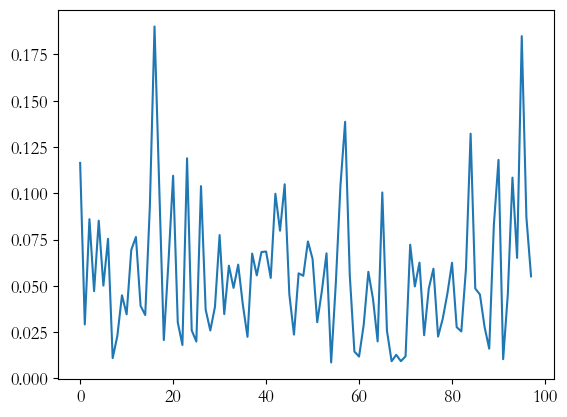

In [ ]:
# A normality test of loss distributions (Shapiro) for the example
plt.plot(np.arange(len(df_results)),df_results["loss_binomial"])
print(shapiro(df_results["loss_binomial"]))

In [ ]:
# Wilcoxon tests
models = ["gamma", "factor_poisson", "static", "gaussian"]

for model in models:
    w, p_w = wilcoxon(df_results["loss_binomial"], df_results[f"loss_{model}"])
    print(f"TDM Binomial vs {model}: p={p_w:.4f}")


TDM Binomial vs gamma: p=0.0000
TDM Binomial vs factor_poisson: p=0.0001
TDM Binomial vs static: p=0.0000
TDM Binomial vs gaussian: p=0.0000


## 3.2 P2 – The TDM Binomial 2D is more efficient on the second and third periods than on the first (Kruskal, then Wilcoxon tests).

Data visualisation (boxplots)

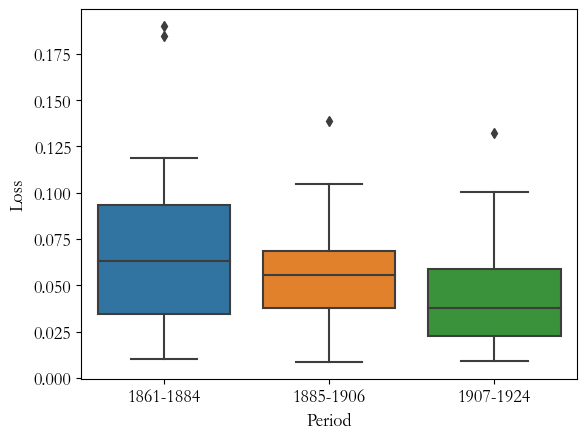

In [16]:
sns.boxplot(data=df_results, x="periode", y="loss_binomial")
#plt.title("Figure 1")
plt.xlabel("Period")
plt.ylabel("Loss")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])
plt.savefig("losses_by_period.svg")

Before carrying out a possible battery of Wilocoxon tests to specifically compare the periods, we perform a Kruskal test (non-parametric variant of the ANOVA test), to verify that at least one difference is significant (variances of the K.L divs.).

In [17]:
groups = [df_results_1["loss_binomial"], df_results_2["loss_binomial"], df_results_3["loss_binomial"]]
H, p_kw = kruskal(*groups)
print(f"Kruskal H={H:.3f}, p={p_kw:.4f}")

Kruskal H=7.963, p=0.0187


# 4. Performances of the TDM Binomial 3D (with tritones)

## 4.1 Comparaison with Binomial 2D

In [ ]:
print("Average loss over all pieces : \n")
print(f'Binomial :  {df_results["loss_binomial"].mean():.5f} \nBinomial with tritones : {df_results["loss_binomial_tritones"].mean():.5f} ')

Loss moyenne sur toute les pièces : 

Binomial :  0.05670 
Binomial with tritones : 0.04683 


In [ ]:
print("Average loss for period 1: \n")
print(f'Binomial :  {df_results_1["loss_binomial"].mean():.5f} \nBinomial with tritones {df_results_1["loss_binomial_tritones"].mean():.5f} ')

Loss moyenne sur la période 1: 

Binomial :  0.06884 
Binomial with tritones 0.05647 


In [ ]:
print("Average loss for period 2 : \n")
print(f'Binomial :  {df_results_2["loss_binomial"].mean():.5f} \nBinomial with tritones {df_results_2["loss_binomial_tritones"].mean():.5f} ')

Loss moyenne sur la période 2 : 

Binomial :  0.05740 
Binomial with tritones 0.04740 


In [ ]:

print("Average loss for period 3 : \n")
print(f'Binomial :  {df_results_3["loss_binomial"].mean():.5f} \nBinomial with tritones {df_results_3["loss_binomial_tritones"].mean():.5f} ')

Loss moyenne sur la période : 

Binomial :  0.04252 
Binomial with tritones 0.03557 


In [22]:
w, p_w = wilcoxon(df_results["loss_binomial_tritones"], df_results[f"loss_binomial"])
print(f"TDM Binomial tritones vs TDM binomial p={p_w:.4f}")

TDM Binomial tritones vs TDM binomial p=0.0000


## 4.2 Performance comparison by period

[Text(0, 0, '1861-1884'), Text(1, 0, '1885-1906'), Text(2, 0, '1907-1924')]

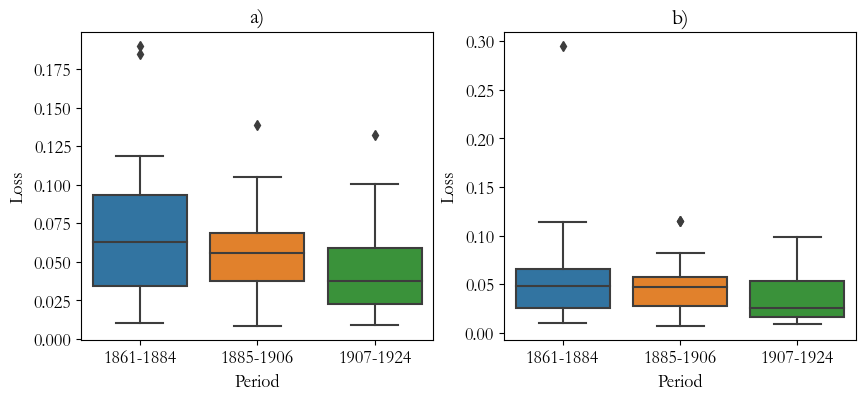

In [ ]:
figure = plt.figure(figsize=(10,4))
plt.suptitle("Average loss by period for 2D and 3D Binomial models")
plt.subplot(1,2,1)
sns.boxplot(data=df_results, x="periode", y="loss_binomial")
plt.xlabel("Period")
plt.ylabel("Loss")
plt.title("a)")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])

plt.subplot(1,2,2)
sns.boxplot(data=df_results, x="periode", y="loss_binomial_tritones")
plt.xlabel("Period")
plt.ylabel("Loss")
plt.title("b)")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])


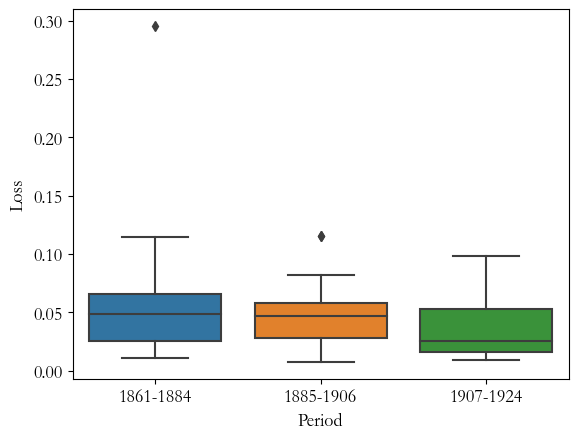

In [ ]:
sns.boxplot(data=df_results, x="periode", y="loss_binomial_tritones")
plt.xlabel("Period")
plt.ylabel("Loss")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])
plt.show()

In [35]:
groups = [df_results_1["loss_binomial_tritones"], df_results_2["loss_binomial_tritones"], df_results_3["loss_binomial_tritones"]]
H, p_kw = kruskal(*groups)
print(f"Kruskal H={H:.3f}, p={p_kw:.4f}")

Kruskal H=6.752, p=0.0342


In [50]:
stat, p_value = mannwhitneyu(df_results_1["loss_binomial_tritones"], df_results_3["loss_binomial_tritones"], alternative="two-sided")
print('Statistics=%.4f, p=%.4f' % (stat, p_value))

Statistics=665.0000, p=0.0197


## 4.3 Rudimentary musicological analysis (interpretation of parameters learned by the model)

### 4.3.1 Data manipulation: retrieval of learned weights for the different intervals (fifths, minor thirds, major thirds, tritones)

In [7]:
# We choose to add the weights associated with the "lower" and "upper" versions for each interval type.
# We therefore obtain a single score for fifths (whether lower or upper), and similarly for minor thirds, etc.
fifths = []
minor_thirds = []
major_thirds = []
tritones = []

for i in range(len(df_params["weights_binomial_tritones"])):
    separated = re.sub(r"(\s)+", r",", df_params["weights_binomial_tritones"][i][1:-1].strip())
    list_of_values = separated.split(",")
    fifths.append(float(list_of_values[0]) + float(list_of_values[1]))
    minor_thirds.append(float(list_of_values[2]) + float(list_of_values[3]))
    major_thirds.append(float(list_of_values[4]) + float(list_of_values[5]))
    tritones.append(float(list_of_values[6]) + float(list_of_values[7]))



In [8]:
df_params["fifths"] = fifths
df_params["minor_thirds"] = minor_thirds
df_params["major_thirds"] = major_thirds
df_params["tritones"]  = tritones

### 4.3.2 Data visualisation

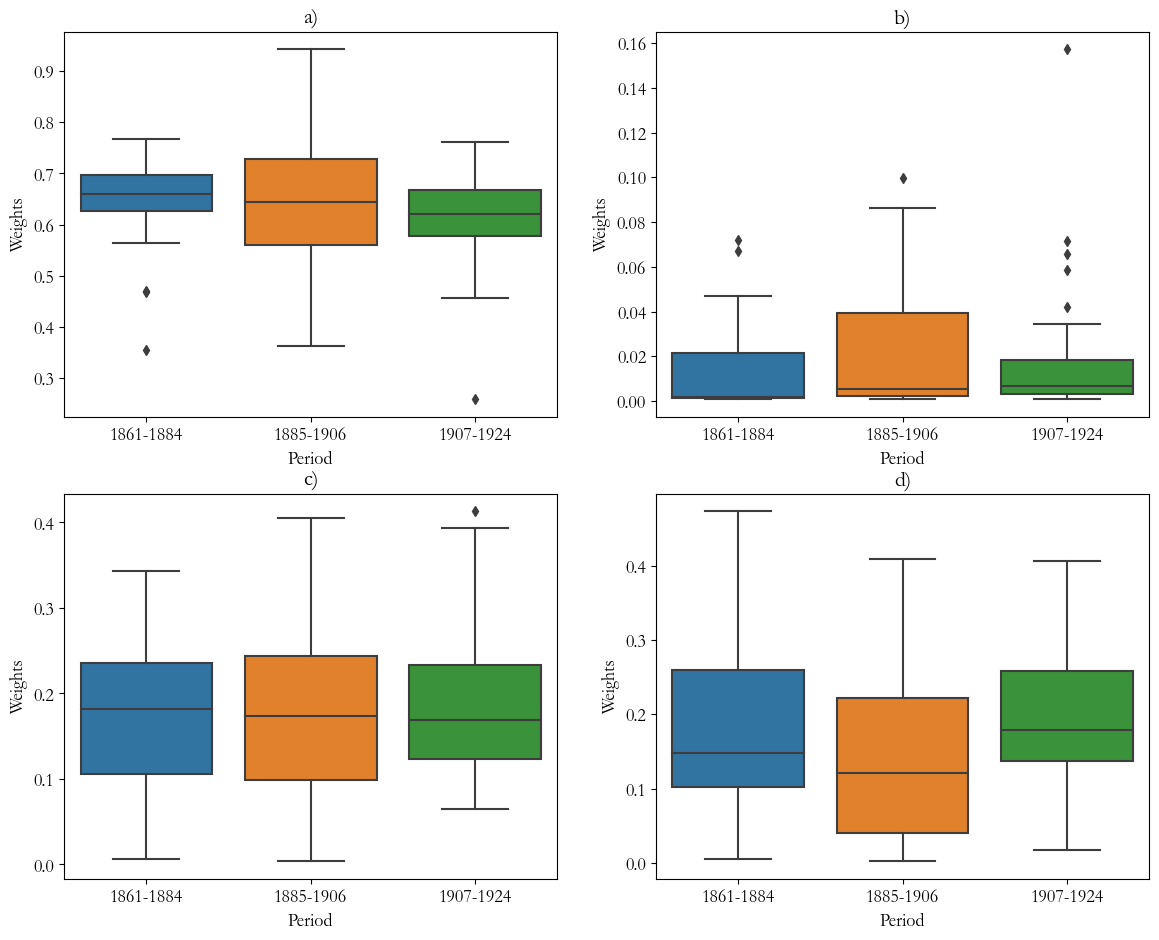

In [9]:
fig = plt.figure(figsize=(14, 11))
# I) Poids associés aux quintes selon la période
plt.subplot(2, 2, 1)
sns.boxplot(data=df_params, x="periode", y="fifths")
plt.title("a)")
plt.xlabel("Period")
plt.ylabel("Weights")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])

# II) Poids associés aux tritons selon la période
plt.subplot(2, 2, 2)
sns.boxplot(data=df_params, x="periode", y="tritones")
plt.title("b)")
plt.xlabel("Period")
plt.ylabel("Weights")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])

# III) Poids associés aux tierces mineures selon la période
plt.subplot(2, 2, 3)
sns.boxplot(data=df_params, x="periode", y="minor_thirds")
plt.title("c)")
plt.xlabel("Period")
plt.ylabel("Weights")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])

# IV) Poids associés aux tierces majeures selon la période
plt.subplot(2, 2, 4)
sns.boxplot(data=df_params, x="periode", y="major_thirds")
plt.title("d)")
plt.xlabel("Period")
plt.ylabel("Weights")
plt.gca().set_xticklabels(["1861-1884", "1885-1906", "1907-1924"])
plt.savefig("weights.svg")

Testing data normality

In [ ]:
print("Shapiro (normalité) :", shapiro(df_params["tritones"]))

Shapiro (normalité) : ShapiroResult(statistic=0.6821397542953491, pvalue=2.9446849689543364e-13)


Since the normality of the data is not verified ($p < 0.05$, Shapiro), we will test our predictions using the Mann-Whitney U test (non-parametric and suitable for unmatched distributions, unlike the Wilcoxon test).

In [ ]:
# weights for tritone intervals by period
for (a, b) in [(1,3), (2,3), (1,2)]:
    stat, p = mannwhitneyu(
        df_params[df_params["periode"] == a]["tritones"],
        df_params[df_params["periode"] == b]["tritones"],
        alternative="two-sided"
    )
    print(f"Period {a} vs {b} : U = {stat:.3f}, p = {p:.4f}")

Période 1 vs 3 : U = 328.000, p = 0.0219
Période 2 vs 3 : U = 524.000, p = 0.9948
Période 1 vs 2 : U = 362.000, p = 0.0083


In [ ]:
# weights for fifth intervals by period : 
for (a, b) in [(1,2), (1,3), (2,3)]:
    stat, p = mannwhitneyu(
        df_params[df_params["periode"] == a]["fifths"],
        df_params[df_params["periode"] == b]["fifths"],
        alternative="two-sided"
    )
    print(f"Perio {a} vs {b} : U = {stat:.3f}, p = {p:.4f}")

Période 1 vs 2 : U = 608.000, p = 0.7128
Période 1 vs 3 : U = 622.000, p = 0.0817
Période 2 vs 3 : U = 618.000, p = 0.2235


In [ ]:
# DMinor thirds
for (a, b) in [(1,2), (1,3), (2,3)]:
    stat, p = mannwhitneyu(
        df_params[df_params["periode"] == a]["minor_thirds"],
        df_params[df_params["periode"] == b]["minor_thirds"],
        alternative="two-sided"
    )
    print(f"Period {a} vs {b} : U = {stat:.3f}, p = {p:.4f}")

Période 1 vs 2 : U = 550.000, p = 0.7404
Période 1 vs 3 : U = 486.000, p = 0.9069
Période 2 vs 3 : U = 527.000, p = 0.9843


In [ ]:
# Major thirds
for (a, b) in [(1,2), (1,3), (2,3)]:
    stat, p = mannwhitneyu(
        df_params[df_params["periode"] == a]["major_thirds"],
        df_params[df_params["periode"] == b]["major_thirds"],
        alternative="two-sided"
    )
    print(f"Period {a} vs {b} : U = {stat:.3f}, p = {p:.4f}")

Période 1 vs 2 : U = 644.000, p = 0.4180
Période 1 vs 3 : U = 412.000, p = 0.2562
Période 2 vs 3 : U = 415.000, p = 0.1496


In [37]:
fff = pd.read_csv(r"C:\Users\sacha\OneDrive\Documents\testPython\myvenv\tdm\CorpusbeethovMvp_results.csv")

In [38]:
fff["loss_binomial_tritones"].mean()

0.07005918785450069